# **Experiment-4 Notebook (ElasticNet Regression Model)**

# Machine Learning Algorithms & Appliations (36106)



## Context

Experiment 4: With the same chosen features as for experiment 1, train an ElasticNet regression model on them and tune the hyperparameters according to the results from previous experiments, analyse the results and make recommendations for next experiments.


### 0. Import Packages

In [ ]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 23.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.


In [1]:
#Importing necessary datasets required for running this experiment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.   Load Dataset

In [2]:
from google.colab import files

# Defining list of files we need to run this experiment
file_names = ["salary_test.csv", "salary_validation.csv", "salary_training.csv"]

# Loop through the list and upload each file
for file_name in file_names:
    uploaded = files.upload()

Saving salary_training.csv to salary_training.csv


Saving salary_validation.csv to salary_validation.csv


Saving salary_test.csv to salary_test.csv


In [3]:
df = pd.read_csv("salary_training.csv")
df1 = pd.read_csv("salary_validation.csv")
df2 = pd.read_csv("salary_test.csv")

### 2. Explore Dataset

In [4]:
# Printing the first few rows of training dataset
df.head(5)

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,...,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,604399,f,1990-10-22,87.80,2009,84.00,6920,1,B.Tech/B.E.,instrumentation and control engineering,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,2010,64.50,6624,2,B.Tech/B.E.,computer science & engineering,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,2007,85.17,9084,2,B.Tech/B.E.,electronics & telecommunications,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,2009,86.00,8195,1,B.Tech/B.E.,computer science & engineering,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,2008,75.00,4889,2,B.Tech/B.E.,biotechnology,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
# Printing the last few rows of training dataset
df.tail()

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,...,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
2993,103174,f,1989-04-17,75.00,2005,73.00,1263,2,B.Tech/B.E.,electronics and communication engineering,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,1991-07-22,84.00,2008,77.00,9481,2,B.Tech/B.E.,information technology,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,1988-11-24,91.40,2006,65.56,547,2,B.Tech/B.E.,information technology,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,1988-08-25,88.64,2006,65.16,1629,2,B.Tech/B.E.,computer engineering,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000
2997,993701,m,1992-05-27,77.00,2009,75.50,1111,2,B.Tech/B.E.,information technology,...,-1,-1,-1,-1,-0.5899,-1.9521,0.3174,1.16010,-2.3937,200000


In [ ]:
# Describing the shape of the dataset
df.shape

(2998, 31)

In [ ]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2998 non-null   int64  
 1   gender                 2998 non-null   object 
 2   dob                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   12graduation           2998 non-null   int64  
 5   12percentage           2998 non-null   float64
 6   collegeid              2998 non-null   int64  
 7   collegetier            2998 non-null   int64  
 8   degree                 2998 non-null   object 
 9   specialization         2998 non-null   object 
 10  collegegpa             2998 non-null   float64
 11  collegecityid          2998 non-null   int64  
 12  collegecitytier        2998 non-null   int64  
 13  graduationyear         2998 non-null   int64  
 14  english                2998 non-null   int64  
 15  logi

### 3. Explore Target variable

In the context of predicting the salary of engineering students across different colleges, the target variable would typically be the salary of the students. Therefore, the target variable in this case would be the "salary" of the engineering students.

In [ ]:
target = df['salary']

In [ ]:
# Checking fo any Missing Values in Target Variable
missing_values = target.isnull().sum()
print("Number of missing values in salary:", missing_values)

Number of missing values in salary: 0


In [ ]:
# Displaying the descriptive statstics of target variable
summary_stats = target.describe()
summary_stats = summary_stats.astype(int)
print(summary_stats)

count       2998
mean      305174
std       212331
min        35000
25%       180000
50%       300000
75%       370000
max      4000000
Name: salary, dtype: int64


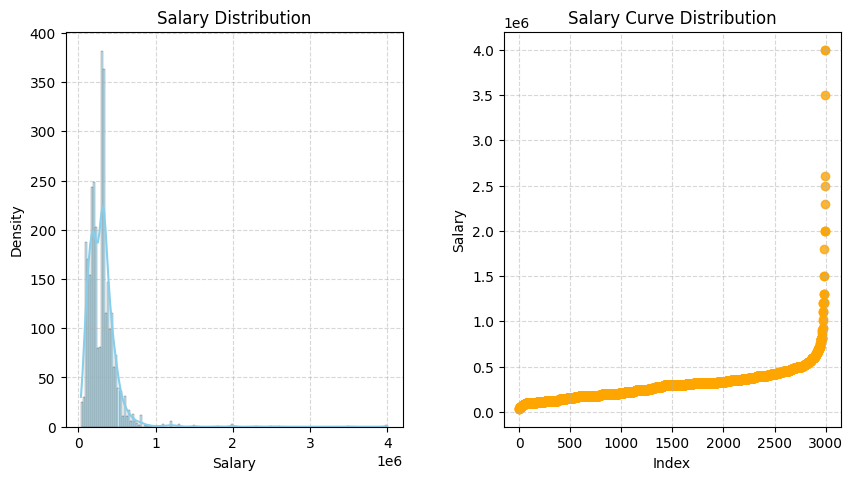

In [ ]:
# Generating Distribution plots for Target Variable only
plt.figure(figsize=(10, 5))
plt.rcParams['font.family'] = 'sans-serif'

# Subplot 1: Distribution Plot
plt.subplot(121)
sns.histplot(target, kde=True, color='skyblue', edgecolor='black')
plt.title('Salary Distribution', fontsize=12)
plt.xlabel('Salary', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Subplot 2: Salary Curve Distribution
plt.subplot(122)
plt.scatter(range(target.shape[0]), np.sort(target.values), color='orange', alpha=0.8)
plt.title('Salary Curve Distribution', fontsize=12)
plt.xlabel('Index', fontsize=10)
plt.ylabel('Salary', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.9)
plt.show()

### Observation from Plots ###
The distribution exhibits a positive skew, indicated by a longer tail extending towards the higher values on the right side compared to the left side.

<ipython-input-13-63b976e4e8fe>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(target, color='skyblue', shade=True)


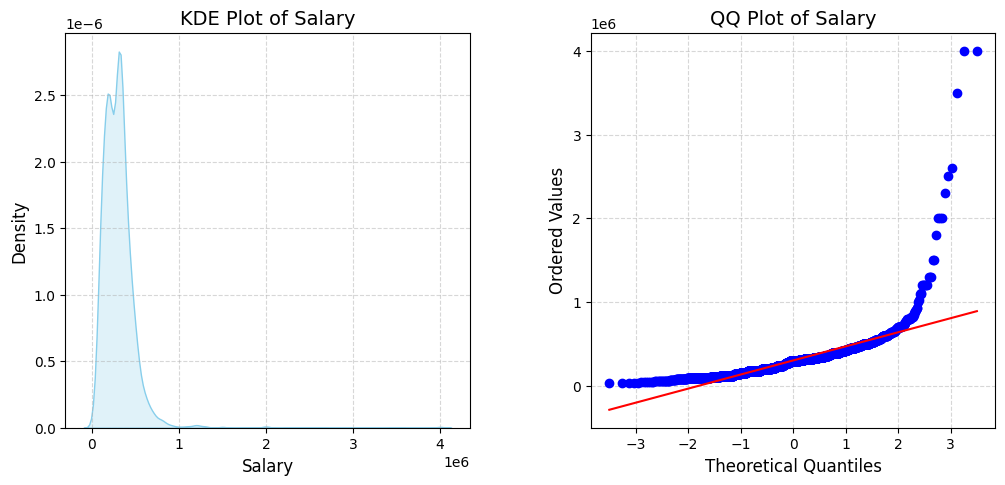

In [ ]:

import scipy.stats as stats
plt.figure(figsize=(12, 5))

# KDE plot
plt.subplot(121)
sns.kdeplot(target, color='skyblue', shade=True)
plt.title('KDE Plot of Salary', fontsize=14)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# QQ plot
plt.subplot(122)
stats.probplot(target, dist="norm", plot=plt)
plt.title('QQ Plot of Salary', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Ordered Values', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.9)
plt.show()

In [ ]:
# Defining Quartiles for removal of outliers- Salary
Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)
IQR = Q3 - Q1

# Counting outliers
total_outlier_num = ((target < (Q1 - 1.5 * IQR)) | (target > (Q3 + 1.5 * IQR))).sum()

print("Total Number of Outliers in Salary: {}".format(total_outlier_num))

Total Number of Outliers in Salary: 78


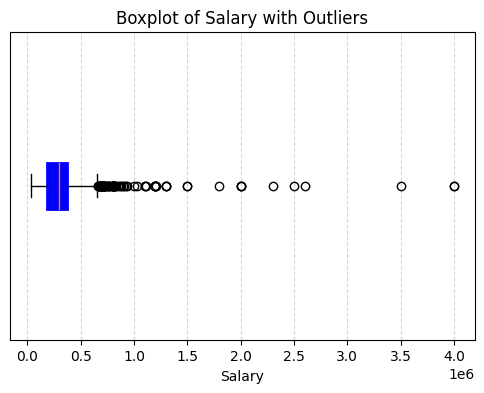

In [ ]:
# Visualizing Outliers for Target Variable
plt.figure(figsize=(6, 4))  # Adjust the figsize as needed

# Create a boxplot
bp = plt.boxplot(target, vert=False, showfliers=True, patch_artist=True)

# Customize box color
for box in bp['boxes']:
    box.set(color='blue', linewidth=2)  # Change color to blue and set linewidth

# Add labels and title
plt.title('Boxplot of Salary with Outliers', fontsize=12)  # Reduce title fontsize
plt.xlabel('Salary', fontsize=10)  # Reduce xlabel fontsize
plt.yticks([])  # Remove yticks
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

### 4. Explore Variables of Interest

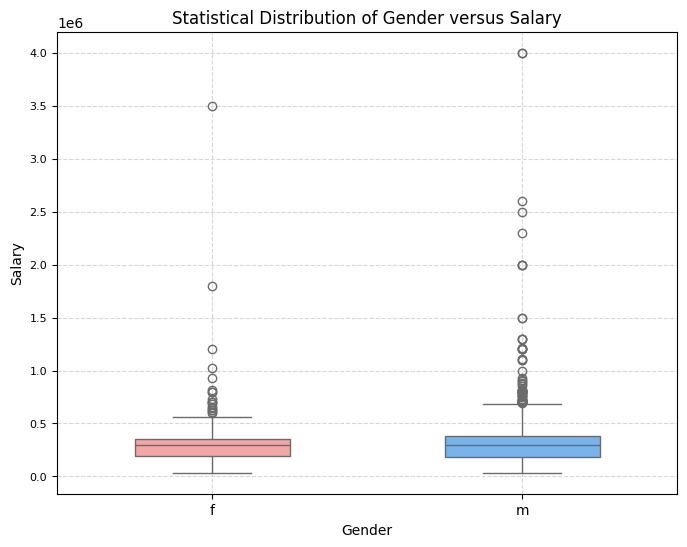

In [ ]:
# Exploring the relationship between Gender of Applicants & Salary
plt.figure(figsize=(8, 6))

# Set custom color palette
colors = ['#ff9999', '#66b3ff']

# Create boxplot
sns.boxplot(x='gender', y='salary', data=df, hue='gender', palette=colors, width=0.5, legend=False)

# Add title and labels with reduced font sizes
plt.title('Statistical Distribution of Gender versus Salary', fontsize=12)  # Reduce title fontsize
plt.xlabel('Gender', fontsize=10)  # Reduce xlabel fontsize
plt.ylabel('Salary', fontsize=10)  # Reduce ylabel fontsize

# Customize y-axis tick labels for better readability
plt.yticks(fontsize=8)  # Reduce tick label fontsize

# Add gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

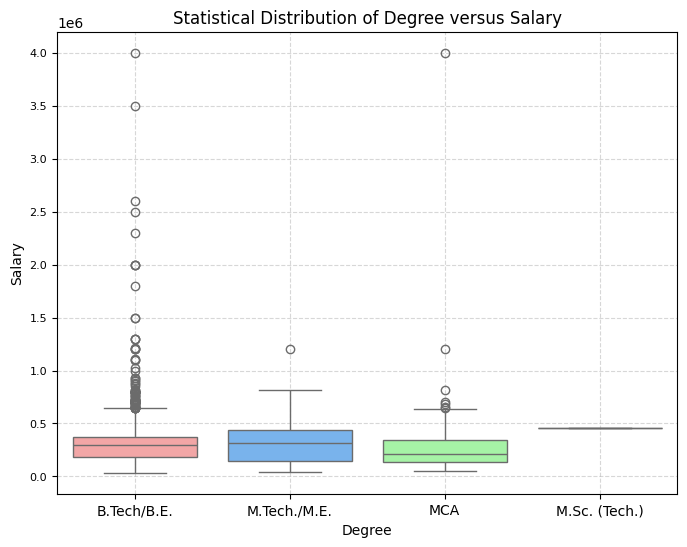

In [ ]:
# Exploring the relationship between Degree of Applicants & Salary

# Define custom color palette with four distinct colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(8, 6))

# Create boxplot with x variable assigned to hue and legend disabled
sns.boxplot(x='degree', y='salary', data=df, hue='degree', palette=colors, legend=False)

# Add title and labels with reduced font sizes
plt.title('Statistical Distribution of Degree versus Salary', fontsize=12)  # Reduce title fontsize
plt.xlabel('Degree', fontsize=10)  # Reduce xlabel fontsize
plt.ylabel('Salary', fontsize=10)  # Reduce ylabel fontsize

# Customize y-axis tick labels for better readability
plt.yticks(fontsize=8)  # Reduce tick label fontsize

# Add gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [5]:
# checking the count of unique specialization present in dataframe
df.specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [6]:
# create the copy of dataframe
data = df.copy()
# count of unique categories in specialization
value_count = data['specialization'].value_counts()

def map_to_other_specialization(var):
    ''' if count of unique category is less than 10, replace the category as other '''
    if var in value_count[value_count<=10]:
        return 'other'
    else:
        return var

# apply the function to specialization to get the results
df['specialization'] = df.specialization.apply(map_to_other_specialization)

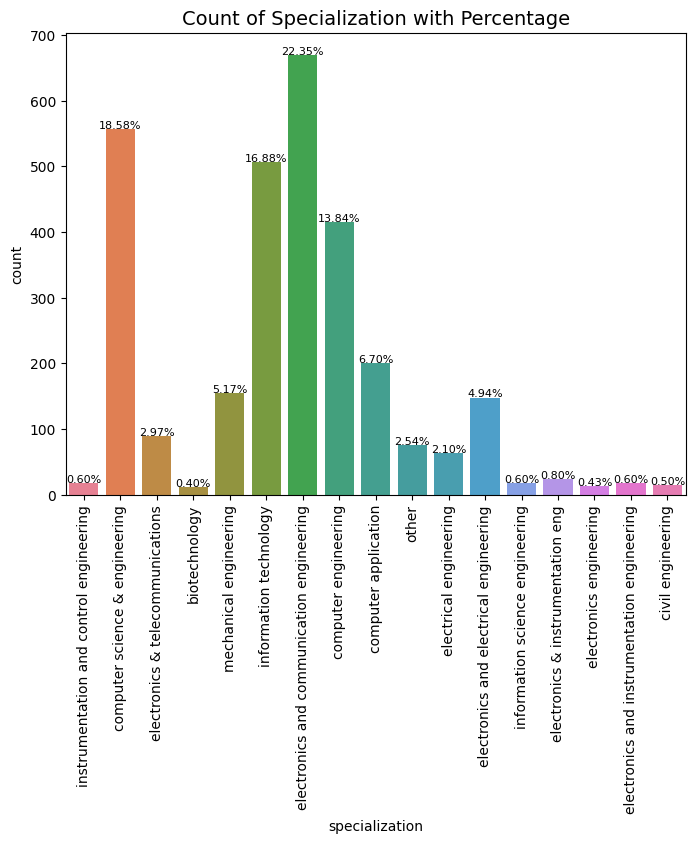

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Reduce figsize for smaller size

# Create count plot with hue set to 'specialization'
ax = sns.countplot(x='specialization', hue='specialization', data=df)

# Add percentage labels
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 1,
            '{:.2f}%'.format((height/total) * 100),
            ha="center", fontsize=8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title
plt.title('Count of Specialization with Percentage', fontsize=14)

plt.show()

In [8]:
# electronics & instrumentation engineering is repeating here with slight change in name so converting it into one category
df['specialization'] = df['specialization'].str.replace('electronics & instrumentation eng',\
                                                'electronics and instrumentation engineering')

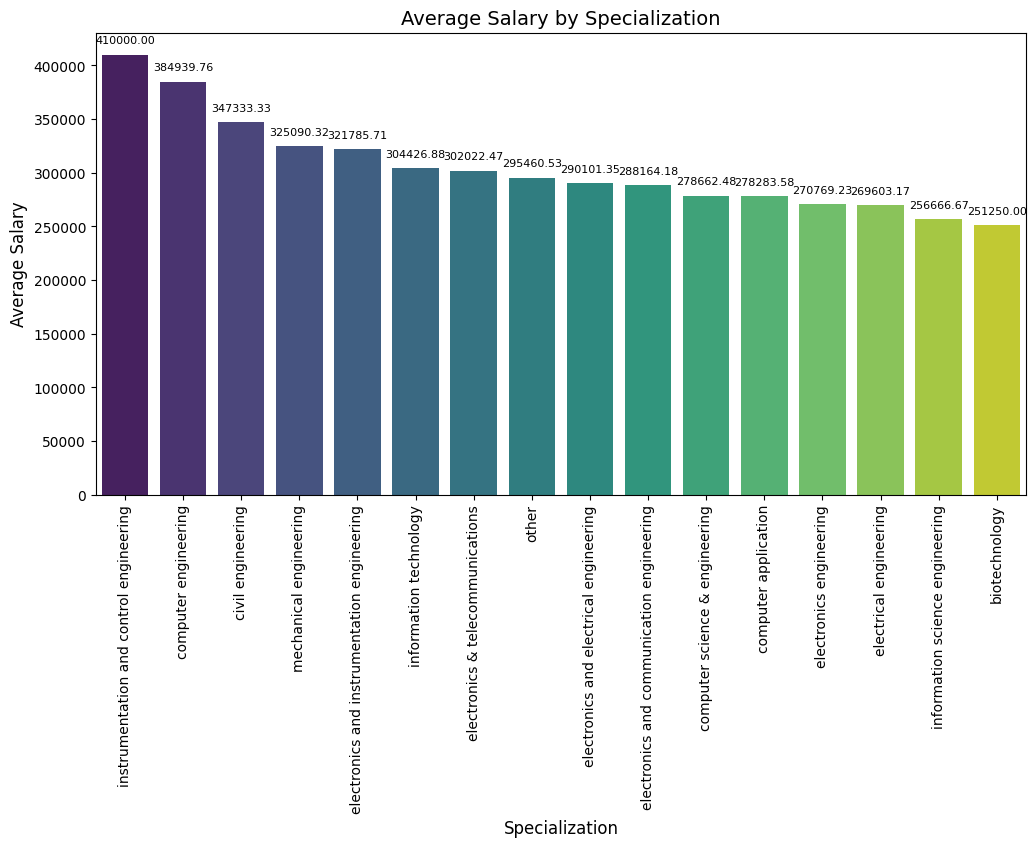

In [12]:
# Calculate average salary by specialization and sort them in decreasing order
avg_sal_per_specialization = df.groupby('specialization').agg(mean_salary=('salary', 'mean')).sort_values(by='mean_salary', ascending=False)

# Define custom color palette
custom_palette = sns.color_palette('viridis', len(avg_sal_per_specialization))

# Barplot of mean salary and specialization
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=avg_sal_per_specialization.index, y='mean_salary', data=avg_sal_per_specialization, palette=custom_palette, hue='specialization')
plt.xticks(rotation=90)
plt.title('Average Salary by Specialization', fontsize=14)  # Add title
plt.xlabel('Specialization', fontsize=12)  # Add x-axis label
plt.ylabel('Average Salary', fontsize=12)  # Add y-axis label

# Add labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize=8)

plt.show()

In [ ]:
from datetime import date
# Assuming 'now' is today's date, let's convert it to a pandas Timestamp
now = pd.Timestamp(date.today())

# Convert 'dob' column to datetime
df["dob"] = pd.to_datetime(df["dob"])

# Calculate age using the difference in years between 'now' and 'dob'
df["Age"] = ((now - df["dob"]).dt.days / 365).astype(int)

# If 'graduationyear' is already an integer, no need to convert it
# But if it's stored as a string or object, convert it to integer
df['graduationyear'] = df['graduationyear'].astype(int)

# Calculate 'graduation_age' by subtracting 'dob' year from 'graduationyear'
df['graduation_age'] = df['graduationyear'] - df['dob'].dt.year

In [ ]:
max_age =df['Age'].max()

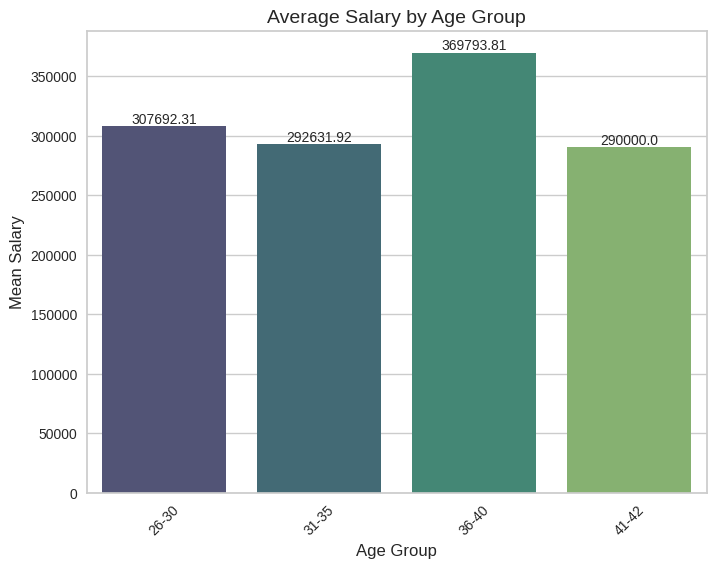

In [ ]:
# Define age bins based on the maximum age excluding specified age groups
age_bins = [25, 30, 35, 40, 45]

# Define age labels
age_labels = ['26-30', '31-35', '36-40', '41-' + str(max_age)]

# Categorize ages into age groups
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate mean salary for each age group
mean_salary_per_age_group = df.groupby('age_group', observed=True)['salary'].mean()  # Set observed=True to suppress the warning

# Plot histogram
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_salary_per_age_group.index, y=mean_salary_per_age_group.values, hue=mean_salary_per_age_group.index, palette='viridis', saturation=0.5, dodge=False, legend=False)  # Assign 'x' variable to 'hue' to suppress the warning
plt.title('Average Salary by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Mean Salary', fontsize=12)
plt.xticks(rotation=45)

# Add labels to bars
for index, value in enumerate(mean_salary_per_age_group.values):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

plt.show()

### 5. Prepare Data

In [ ]:
df_cleaned = df.copy()
df1_cleaned = df1.copy()
df2_cleaned = df2.copy()

In [ ]:
# Convert 'dob' column to datetime for both test & validation datset
df1_cleaned["dob"] = pd.to_datetime(df1_cleaned["dob"])
df2_cleaned["dob"] = pd.to_datetime(df2_cleaned["dob"])

# Calculate age using the difference in years between 'now' and 'dob'
df1_cleaned["Age"] = ((now - df1_cleaned["dob"]).dt.days / 365).astype(int)
df2_cleaned["Age"] = ((now - df2_cleaned["dob"]).dt.days / 365).astype(int)

# If 'graduationyear' is already an integer, no need to convert it
# But if it's stored as a string or object, convert it to integer
df1_cleaned['graduationyear'] = df1_cleaned['graduationyear'].astype(int)
df2_cleaned['graduationyear'] = df2_cleaned['graduationyear'].astype(int)

# Calculate 'graduation_age' by subtracting 'dob' year from 'graduationyear'
df1_cleaned['graduation_age'] = df1_cleaned['graduationyear'] - df1_cleaned['dob'].dt.year
df2_cleaned['graduation_age'] = df2_cleaned['graduationyear'] - df2_cleaned['dob'].dt.year

In [ ]:
def get_column_lists(df_cleaned):
    # List of categorical columns for one-hot encoding
    categorical_columns = [col for col in df_cleaned.columns if df_cleaned.dtypes[col] == 'object']

    # List of numerical columns to standardized data
    numerical_columns = [col for col in df_cleaned.columns if (df_cleaned.dtypes[col] != 'object')]

    return numerical_columns, categorical_columns

# Call the function with your DataFrame
numerical_cols, categorical_cols = get_column_lists(df_cleaned)
numerical_cols1, categorical_cols1 = get_column_lists(df1_cleaned)
numerical_cols2, categorical_cols2 = get_column_lists(df2_cleaned)

print('Numerical Features are : ', numerical_cols,numerical_cols1,numerical_cols2)
print('\n')
print('Categorical Features are : ', categorical_cols,categorical_cols1,categorical_cols2)

Numerical Features are :  ['10percentage', '12percentage', 'collegetier', 'collegegpa', 'collegecitytier', 'english', 'logical', 'quant', 'domain', 'computerprogramming', 'electronicsandsemicon', 'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'salary', 'Age', 'age_group'] ['10percentage', '12percentage', 'collegetier', 'collegegpa', 'collegecitytier', 'english', 'logical', 'quant', 'domain', 'computerprogramming', 'electronicsandsemicon', 'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'salary', 'Age'] ['10percentage', '12percentage', 'collegetier', 'collegegpa', 'collegecitytier', 'english', 'logical', 'quant', 'domain', 'computerprogramming', 'electronicsandsemicon', 'computerscience', 'mechanicalengg', 'electricalengg', 'telecom

In [ ]:
def drop_columns(df_cleaned, columns_to_drop):
    df_cleaned.drop(columns_to_drop, axis=1, inplace=True)
    return df_cleaned

columns_to_drop = ['id', 'dob','12graduation','collegeid', 'collegecityid',
                   'graduationyear','graduation_age','specialization']

df_cleaned = drop_columns(df_cleaned, columns_to_drop)
df1_cleaned = drop_columns(df1_cleaned, columns_to_drop)
df2_cleaned = drop_columns(df2_cleaned, columns_to_drop)

In [ ]:
def replace_negative_one(df_cleaned):
    df_cleaned.replace(-1, np.NaN, inplace=True)
    return df_cleaned

# Call the function with your DataFrame
df_cleaned = replace_negative_one(df_cleaned)
df1_cleaned = replace_negative_one(df1_cleaned)
df2_cleaned = replace_negative_one(df2_cleaned)

In [ ]:
# lets check the missing values
df_cleaned.isnull().sum()

gender                      0
10percentage                0
12percentage                0
collegetier                 0
degree                      0
collegegpa                  0
collegecitytier             0
english                     0
logical                     0
quant                       0
domain                    179
computerprogramming       650
electronicsandsemicon    2133
computerscience          2298
mechanicalengg           2811
electricalengg           2876
telecomengg              2724
civilengg                2972
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
salary                      0
Age                         0
age_group                   0
dtype: int64

In [ ]:
# list of columns with null values
missing_values_columns = [col for col in df_cleaned.columns if df_cleaned.isnull().sum()[col] > 0]

In [ ]:
# function for missing values substitution
def fill_missing_values(df_cleaned,missing_values_columns):
    data = df_cleaned.copy()
    '''Filling missing values with mean'''
    for col in missing_values_columns:
        data[col] = data[col].fillna(data[col].mean())

    return data

# lets use this function to fill the missing values
df_cleaned = fill_missing_values(df_cleaned,missing_values_columns)
df1_cleaned = fill_missing_values(df1_cleaned,missing_values_columns)
df2_cleaned = fill_missing_values(df2_cleaned,missing_values_columns)

In [ ]:
df_encoded = df_cleaned.copy()
# Perform one-hot encoding for each categorical column
for col in categorical_cols:
    dummies = pd.get_dummies(df_encoded[col], prefix=col)  # Create dummy variables
    df_encoded = pd.concat([df_encoded, dummies], axis=1)  # Concatenate dummy variables with original DataFrame
    df_encoded.drop(col, axis=1, inplace=True)  # Drop original categorical column

# Display the resulting DataFrame
df_encoded.head()

,10percentage,12percentage,collegetier,collegegpa,collegecitytier,english,logical,quant,domain,computerprogramming,...,openess_to_experience,salary,Age,age_group,gender_f,gender_m,degree_B.Tech/B.E.,degree_M.Sc. (Tech.),degree_M.Tech./M.E.,degree_MCA
0,87.80,84.00,1,73.82,1,650,665,810,0.694479,485.000000,...,0.2889,445000,33,31-35,True,False,True,False,False,False
1,57.00,64.50,2,65.00,0,440,435,210,0.342315,365.000000,...,-0.2859,110000,33,31-35,False,True,True,False,False,False
2,77.33,85.17,2,61.94,0,485,475,505,0.824666,449.553663,...,-0.2875,255000,34,31-35,False,True,True,False,False,False
3,84.30,86.00,1,80.40,1,675,620,635,0.990009,655.000000,...,0.4805,420000,32,31-35,False,True,True,False,False,False
4,82.00,75.00,2,64.30,1,575,495,365,0.278457,315.000000,...,0.1864,200000,33,31-35,True,False,True,False,False,False


In [ ]:
df1_encoded = df1_cleaned.copy()
# Perform one-hot encoding for each categorical column
for col in categorical_cols1:
    dummies = pd.get_dummies(df1_encoded[col], prefix=col)  # Create dummy variables
    df1_encoded = pd.concat([df1_encoded, dummies], axis=1)  # Concatenate dummy variables with original DataFrame
    df1_encoded.drop(col, axis=1, inplace=True)  # Drop original categorical column

# Display the resulting DataFrame
df1_encoded.head()

,10percentage,12percentage,collegetier,collegegpa,collegecitytier,english,logical,quant,domain,computerprogramming,...,extraversion,nueroticism,openess_to_experience,salary,Age,gender_f,gender_m,degree_B.Tech/B.E.,degree_M.Tech./M.E.,degree_MCA
0,80.00,85.60,2,90.10,1,490,555,465,0.996744,615.0,...,0.3174,-1.3753,-0.2859,355000,31,False,True,True,False,False
1,78.93,70.80,2,65.00,0,385,375,575,0.824666,395.0,...,-0.6343,0.4148,-0.1690,240000,32,False,True,True,False,False
2,87.50,93.60,2,70.22,1,380,460,555,0.486747,365.0,...,0.9322,-0.8682,-0.0943,300000,31,True,False,True,False,False
3,80.00,66.66,2,64.06,0,535,425,320,0.356536,515.0,...,-1.5270,-0.3612,0.2889,180000,31,False,True,True,False,False
4,70.00,65.00,2,74.00,0,485,485,445,0.600057,435.0,...,-1.2148,-1.4066,-1.0774,200000,33,True,False,True,False,False


In [ ]:
df2_encoded = df2_cleaned.copy()
# Perform one-hot encoding for each categorical column
for col in categorical_cols2:
    dummies = pd.get_dummies(df2_encoded[col], prefix=col)  # Create dummy variables
    df2_encoded = pd.concat([df2_encoded, dummies], axis=1)  # Concatenate dummy variables with original DataFrame
    df2_encoded.drop(col, axis=1, inplace=True)  # Drop original categorical column

# Display the resulting DataFrame
df2_encoded.head()

,10percentage,12percentage,collegetier,collegegpa,collegecitytier,english,logical,quant,domain,computerprogramming,...,nueroticism,openess_to_experience,salary,Age,gender_f,gender_m,degree_B.Tech/B.E.,degree_M.Sc. (Tech.),degree_M.Tech./M.E.,degree_MCA
0,75.00,60.40,2,72.00,1,350,445,510,0.557390,443.797441,...,-0.1076,-0.2511,120000,30,False,True,True,False,False,False
1,97.00,95.08,2,89.00,0,440,395,545,0.493596,355.000000,...,-1.6289,-0.8608,200000,31,False,True,True,False,False,False
2,79.80,75.60,2,61.90,0,405,620,620,0.376060,395.000000,...,-0.4879,0.2889,510000,32,False,True,True,False,False,False
3,69.92,65.54,2,57.66,1,475,375,415,0.342315,365.000000,...,0.1798,0.1864,530000,35,True,False,True,False,False,False
4,86.80,78.20,2,75.73,1,635,535,495,0.864685,525.000000,...,0.7673,-0.2875,500000,35,False,True,True,False,False,False


In [ ]:
# lets drop one column from each encoded categorical feature to avoid dummy trap
df2_encoded.drop(['degree_M.Sc. (Tech.)'],axis=1,inplace=True)

In [ ]:
# lets drop one column from each encoded categorical feature to avoid dummy trap
df_encoded.drop(['degree_M.Sc. (Tech.)'],axis=1,inplace=True)

In [ ]:
# Drop the 'age_group' column from df_encoded
df_encoded.drop('age_group', axis=1, inplace=True)

In [ ]:
# lets remove collegeTier from numerical features list because it is binary variable
# items to be romoved
unwanted_num = ['collegetier','collegecitytier','salary','age_group']
numerical_cols = [ele for ele in numerical_cols if ele not in unwanted_num]
print(numerical_cols)

['10percentage', '12percentage', 'collegegpa', 'english', 'logical', 'quant', 'domain', 'computerprogramming', 'electronicsandsemicon', 'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Age']


In [ ]:
unwanted_num1 = ['collegetier','collegecitytier','salary']
numerical_cols1 = [ele for ele in numerical_cols1 if ele not in unwanted_num1]
print(numerical_cols1)

['10percentage', '12percentage', 'collegegpa', 'english', 'logical', 'quant', 'domain', 'computerprogramming', 'electronicsandsemicon', 'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Age']


In [ ]:
unwanted_num2 = ['collegetier','collegecitytier','salary']
numerical_cols2 = [ele for ele in numerical_cols2 if ele not in unwanted_num2]
print(numerical_cols2)

['10percentage', '12percentage', 'collegegpa', 'english', 'logical', 'quant', 'domain', 'computerprogramming', 'electronicsandsemicon', 'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Age']


In [ ]:
df = df_encoded
df1 = df1_encoded
df2 = df2_encoded

### 6. Split Dataset

In [ ]:
X_train = df.drop('salary',axis=1)
X_val = df1.drop('salary',axis=1)
X_test = df2.drop('salary',axis=1)

y_train = df['salary']
y_val = df1['salary']
y_test = df2['salary']

In [ ]:
# Scaling Numerical Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[numerical_cols] = sc.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = sc.fit_transform(X_val[numerical_cols])
X_test[numerical_cols] = sc.fit_transform(X_test[numerical_cols])

### 7. Baseline Model

In [ ]:
# Calculate the average of the target variable and save the result into a variable called y_central
y_central = y_train.mean()
y1_central = y_val.mean()
y2_central = y_test.mean()

In [ ]:
#  Create a numpy array called y_base filled with the value contained in y_mean that have the same dimensions as y_train
y_base = np.full(y_train.shape,y_central)
y1_base = np.full(y_val.shape,y1_central)
y2_base = np.full(y_test.shape,y2_central)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print(mse(y_train, y_base, squared=False))
print(mae(y_train, y_base))

print(mse(y_val, y1_base, squared=False))
print(mae(y_val, y1_base))

print(mse(y_test, y2_base, squared=False))
print(mae(y_test, y2_base))

212295.77905147275
122319.20591045576
285560.89500745037
132767.64000100334
169495.5884928024
118057.53049740662


In [ ]:
valid_perf = mse(y_val, y1_base, squared=False)
train_perf = mse(y_train, y_base, squared=False)
test_perf = mse(y_test, y2_base, squared=False)

### 8. Train Machine Learning Model

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {'alpha': [0.01, 0.1, 1.0], 'l1_ratio': [0.1, 0.5, 0.9]}

# Initialize the ElasticNet regression model
elasticnet_model = ElasticNet()

# Initialize GridSearchCV
grid_search = GridSearchCV(elasticnet_model, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_

Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.9}


In [ ]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.9}


In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize the ElasticNet model with the best hyperparameters
model = ElasticNet(alpha=0.1, l1_ratio=0.9)

# Train the model on the training data
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9)

In [ ]:
# Make predictions on the validation data
y_val_pred = model.predict(X_val)

In [ ]:
# Make predictions on the training data
y_train_pred = model.predict(X_train)

In [ ]:
# Make predictions on the validation data
y_val_pred = model.predict(X_val)

In [ ]:
# Calculate RMSE (Root Mean Squared Error) on validation data
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("RMSE on Validation Data:", rmse_val)

RMSE on Validation Data: 267188.9124071804


In [ ]:
# Make predictions on the test data
y_test_pred = model.predict(X_test)

In [ ]:
# Calculate RMSE (Root Mean Squared Error) on test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE on Test Data:", rmse_test)

RMSE on Test Data: 154158.1314845175


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the ElasticNet model
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
mean_cv_score = -cv_scores.mean()

In [ ]:
print("Mean RMSE across CV folds:", mean_cv_score)

Mean RMSE across CV folds: 195917.45519317203


In [ ]:
acc = model.score(X_test,y_test)
print(acc)

0.1727894264446208


In [69]:
acc1 = model.score(X_train,y_train)
print(acc1)

0.15288951777141224


### 9. Assess Model Performance

In [ ]:
import altair as alt
perfect_train = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_train})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_train = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_train_pred})).mark_line().encode(
    x='target',
    y='preds'
  )

perfect_train + pred_chart_train

alt.LayerChart(...)

In [ ]:
perfect_val = alt.Chart(pd.DataFrame({'target': y_val, 'preds': y_val})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_val = alt.Chart(pd.DataFrame({'target': y_val, 'preds': y_val_pred})).mark_line().encode(
    x='target',
    y='preds'
  )

perfect_val + pred_chart_val

alt.LayerChart(...)

In [ ]:
perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test_pred})).mark_line().encode(
    x='target',
    y='preds'
  )

perfect_test + pred_chart_test

alt.LayerChart(...)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate performance metrics for training data
y_train_pred = model.predict(X_train)
model_train_perf = {
    'MAE': mean_absolute_error(y_train, y_train_pred),
    'MSE': mean_squared_error(y_train, y_train_pred),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
}

# Calculate performance metrics for validation data
y_val_pred = model.predict(X_val)
model_valid_perf = {
    'MAE': mean_absolute_error(y_val, y_val_pred),
    'MSE': mean_squared_error(y_val, y_val_pred),
    'RMSE': np.sqrt(mean_squared_error(y_val, y_val_pred))
}

# Calculate performance metrics for test data
y_test_pred = model.predict(X_test)
model_test_perf = {
    'MAE': mean_absolute_error(y_test, y_test_pred),
    'MSE': mean_squared_error(y_test, y_test_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
}

print("Model Training Performance:")
print(model_train_perf)
print("\nModel Validation Performance:")
print(model_valid_perf)
print("\nModel Test Performance:")
print(model_test_perf)

Model Training Performance:
{'MAE': 105085.92128423421, 'MSE': 38178844017.760376, 'RMSE': 195394.07365055976}

Model Validation Performance:
{'MAE': 114028.58024314421, 'MSE': 71389914913.33194, 'RMSE': 267188.9124071804}

Model Test Performance:
{'MAE': 102807.6852957602, 'MSE': 23764729502.797787, 'RMSE': 154158.1314845175}
